# Bölüm 1) Veri Okuma + Temizleme + Target Üretimi

In [126]:
import pandas as pd
import numpy as np

In [69]:
# Veri okuma (dosya "#" ile ayrılmış)
df = pd.read_csv("data/input_50.csv", sep="#", engine="python")

In [70]:
# Başta boş kolon oluşmuşsa sil (başta # varsa olur)
if df.columns[0] == "":
    df = df.drop(df.columns[0], axis=1)

In [71]:
# Sütun isimlerini temizle (# ve boşlukları kaldır)
df.columns = (
    df.columns.astype(str)
      .str.replace("#", "", regex=False)
      .str.strip()
)

In [72]:
# -1 değerlerini NaN yap (eksik / aktivite yok işareti)
df = df.replace(-1, np.nan)


In [73]:
# Eksik değer kontrolü
missing = df.isna().sum().sort_values(ascending=False)
print("En çok eksik değere sahip sütunlar:")
print(missing.head(15))


En çok eksik değere sahip sütunlar:
URL_VIEW_TIME_5                         22608
URL_VIEW_TIME_4                         21973
URL_VIEW_TIME_3                         21179
URL_VIEW_TIME_2                         19901
QUIZ_CLOSE_ATTEMPT_TIME_2               19237
QUIZ_CLOSE_ATTEMPT_TIME_3               19237
QUIZ_ATTEMPT_TIME_3                     19018
QUIZ_ATTEMPT_TIME_2                     19018
ACCOMPLISH_OPTIONAL_PERCENTILE_GRADE    18286
ACCOMPLISH_OPTIONAL_GRADE               18286
NP_ACCOMPLISH_OPTIONAL_GRADE            18286
ACCOMPLISH_OPTIONAL                     18286
URL_VIEW_TIME_PCT                       18068
URL_VIEW_TIME_1                         18068
ACCOMPLISH_OPTIONAL_PCT_GRADED          18048
dtype: int64


In [74]:
# Hedef değişken seçimi
if "TARGET" in df.columns:
    target_col = "TARGET"
elif "BIN_TARGET" in df.columns:
    target_col = "BIN_TARGET"
elif "NP_TARGET" in df.columns:
    target_col = "NP_TARGET"
else:
    raise ValueError("TARGET bulunamadı!")

print("Seçilen hedef değişken:", target_col)
print(df[target_col].value_counts(dropna=False).head())


Seçilen hedef değişken: TARGET
TARGET
0.0     3503
10.0    1689
9.0      393
8.0      359
5.0      305
Name: count, dtype: int64


In [75]:
# Kullanılmayan kolonları kaldır
useless_cols = ["UID", "COURSE", "ALL_GRADES_PAST"]
for col in useless_cols:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)


In [76]:
# Aktivite kolonlarını belirle (hedef hariç)
activity_cols = [
    col for col in df.columns
    if (
        "TIME" in col.upper()
        or "PCT" in col.upper()
        or "VIEW" in col.upper()
        or "ATTEMPT" in col.upper()
        or "SUBMIT" in col.upper()
    )
    and col != target_col
]


In [77]:
# Aktivite kolonlarında NaN = 0 (aktivite yok demek)
df[activity_cols] = df[activity_cols].fillna(0)


In [78]:
# PASS_FAIL üret (TARGET >= 5 ise Pass)
if target_col == "BIN_TARGET":
    df["PASS_FAIL"] = df[target_col].astype(int)
else:
    df["PASS_FAIL"] = (df[target_col] >= 5).astype(int)

print("PASS_FAIL dağılımı:")
print(df["PASS_FAIL"].value_counts())


PASS_FAIL dağılımı:
PASS_FAIL
1    15309
0     9951
Name: count, dtype: int64


In [79]:
print("Yeni veri şekli:", df.shape)
df.head()


Yeni veri şekli: (25260, 69)


,Unnamed: 0,ACCOMPLISH_MANDATORY,ACCOMPLISH_MANDATORY_GRADE,ACCOMPLISH_MANDATORY_PCT_GRADED,ACCOMPLISH_MANDATORY_PERCENTILE_GRADE,ACCOMPLISH_OPTIONAL,ACCOMPLISH_OPTIONAL_GRADE,ACCOMPLISH_OPTIONAL_PCT_GRADED,ACCOMPLISH_OPTIONAL_PERCENTILE_GRADE,NP_ACCOMPLISH_MANDATORY_GRADE,...,QUIZ_ATTEMPT_UNIQUE_PCT,QUIZ_CLOSE_ATTEMPT_PCT,QUIZ_CLOSE_ATTEMPT_TIME_1,QUIZ_CLOSE_ATTEMPT_TIME_2,QUIZ_CLOSE_ATTEMPT_TIME_3,QUIZ_CLOSE_ATTEMPT_TIME_PCT,QUIZ_CLOSE_ATTEMPT_UNIQUE_PCT,FORUM_VIEW_FORUM_PCT,FORUM_VIEW_DISCUSSION_PCT,PASS_FAIL
0,0,1.0,9.666667,1.0,43.333333,NaN,NaN,0.0,NaN,9.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
1,1,1.0,9.666667,1.0,43.333333,NaN,NaN,0.0,NaN,9.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
2,2,1.0,9.666667,1.0,43.333333,NaN,NaN,0.0,NaN,9.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1
3,3,1.0,9.666667,1.0,43.333333,NaN,NaN,0.0,NaN,9.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315789,0.0,1
4,4,1.0,9.666667,1.0,43.333333,NaN,NaN,0.0,NaN,9.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1


In [80]:
# Temizlenmiş veriyi kaydet
df.to_csv("processed_clean_data.csv", index=False)
print("Temizlenmiş veri kaydedildi: processed_clean_data.csv")


Temizlenmiş veri kaydedildi: processed_clean_data.csv


File was read correctly using sep="#" because the dataset is hash-separated.

Column names were cleaned to remove # and spaces for easier processing.

All -1 values were converted to NaN because they represent missing or no activity.

Columns with too many missing values were inspected to understand data quality.

Unnecessary columns such as UID, COURSE, ALL_GRADES_PAST were removed because they don’t help the model.

Activity columns had NaN → 0 because missing means no activity.

The target variable was selected (TARGET) and converted into a binary Pass/Fail label.

Veri dosyası sep="#" ile doğru şekilde okundu çünkü sütunlar # ile ayrılmış.


Sütun adlarındaki # ve boşluklar temizlendi.


Tüm -1 değerleri eksik veri olduğu için NaN yapıldı.


Eksik değeri fazla olan kolonlar veri kalitesi için incelendi.


UID, COURSE, ALL_GRADES_PAST gibi modele katkısı olmayan kolonlar kaldırıldı.


Aktivite kolonlarında NaN → 0 yapıldı çünkü eksik değer “aktivite yok” demektir.


Hedef değişken (TARGET) seçildi ve Pass/Fail şeklinde sınıflandırma etiketine dönüştürüldü.



# Bölüm 2) EDA (Özet Grafikler)

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

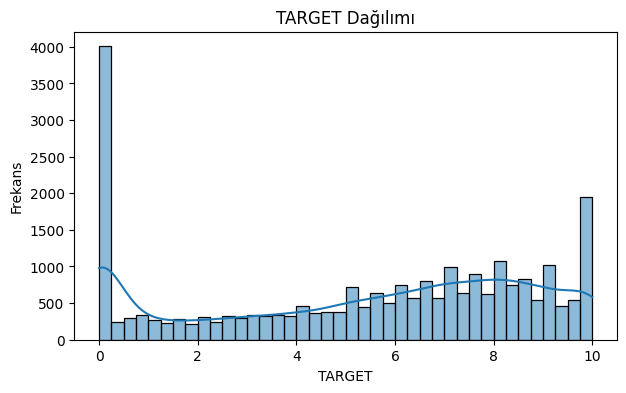

In [82]:
if "TARGET" in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df["TARGET"], bins=40, kde=True)
    plt.title("TARGET Dağılımı")
    plt.xlabel("TARGET")
    plt.ylabel("Frekans")
    plt.show()


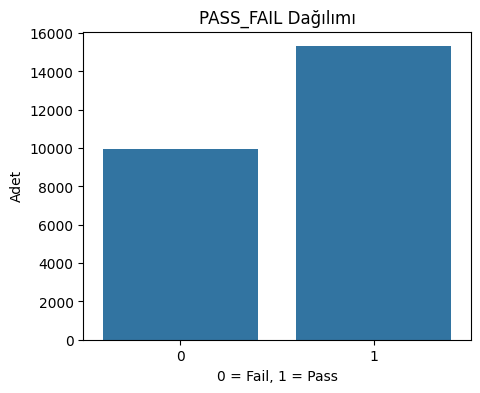

In [83]:
plt.figure(figsize=(5,4))
sns.countplot(x=df["PASS_FAIL"])
plt.title("PASS_FAIL Dağılımı")
plt.xlabel("0 = Fail, 1 = Pass")
plt.ylabel("Adet")
plt.show()


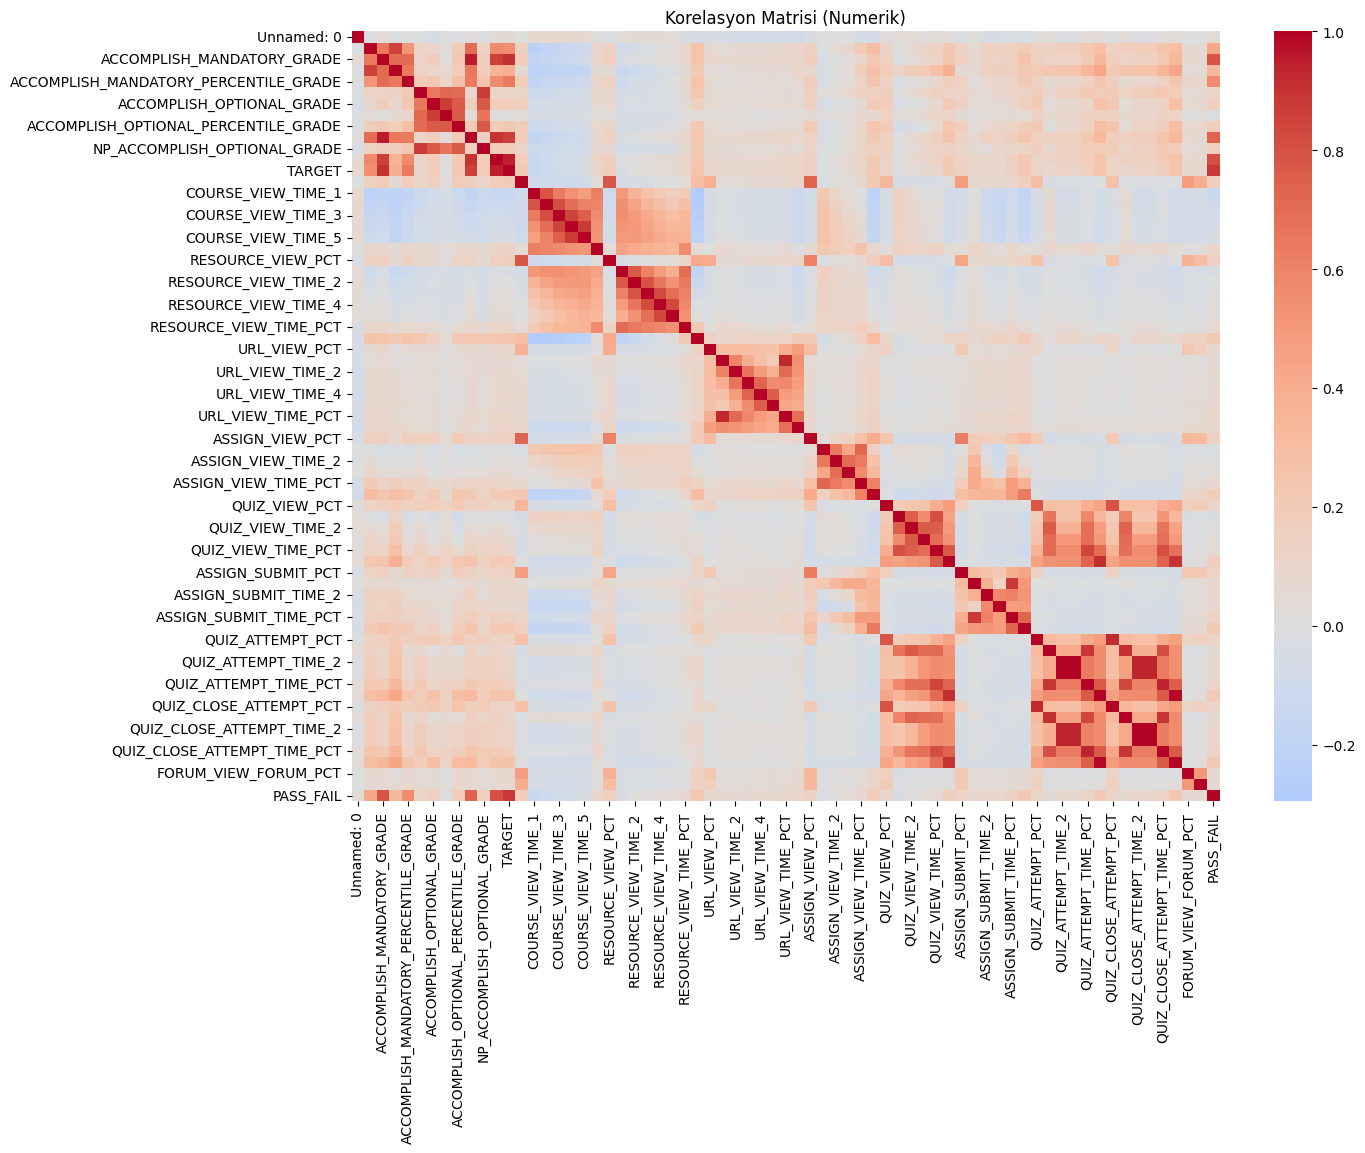

In [84]:
plt.figure(figsize=(14,10))

corr = df.select_dtypes(include=["int64", "float64"]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)

plt.title("Korelasyon Matrisi (Numerik)")
plt.show()


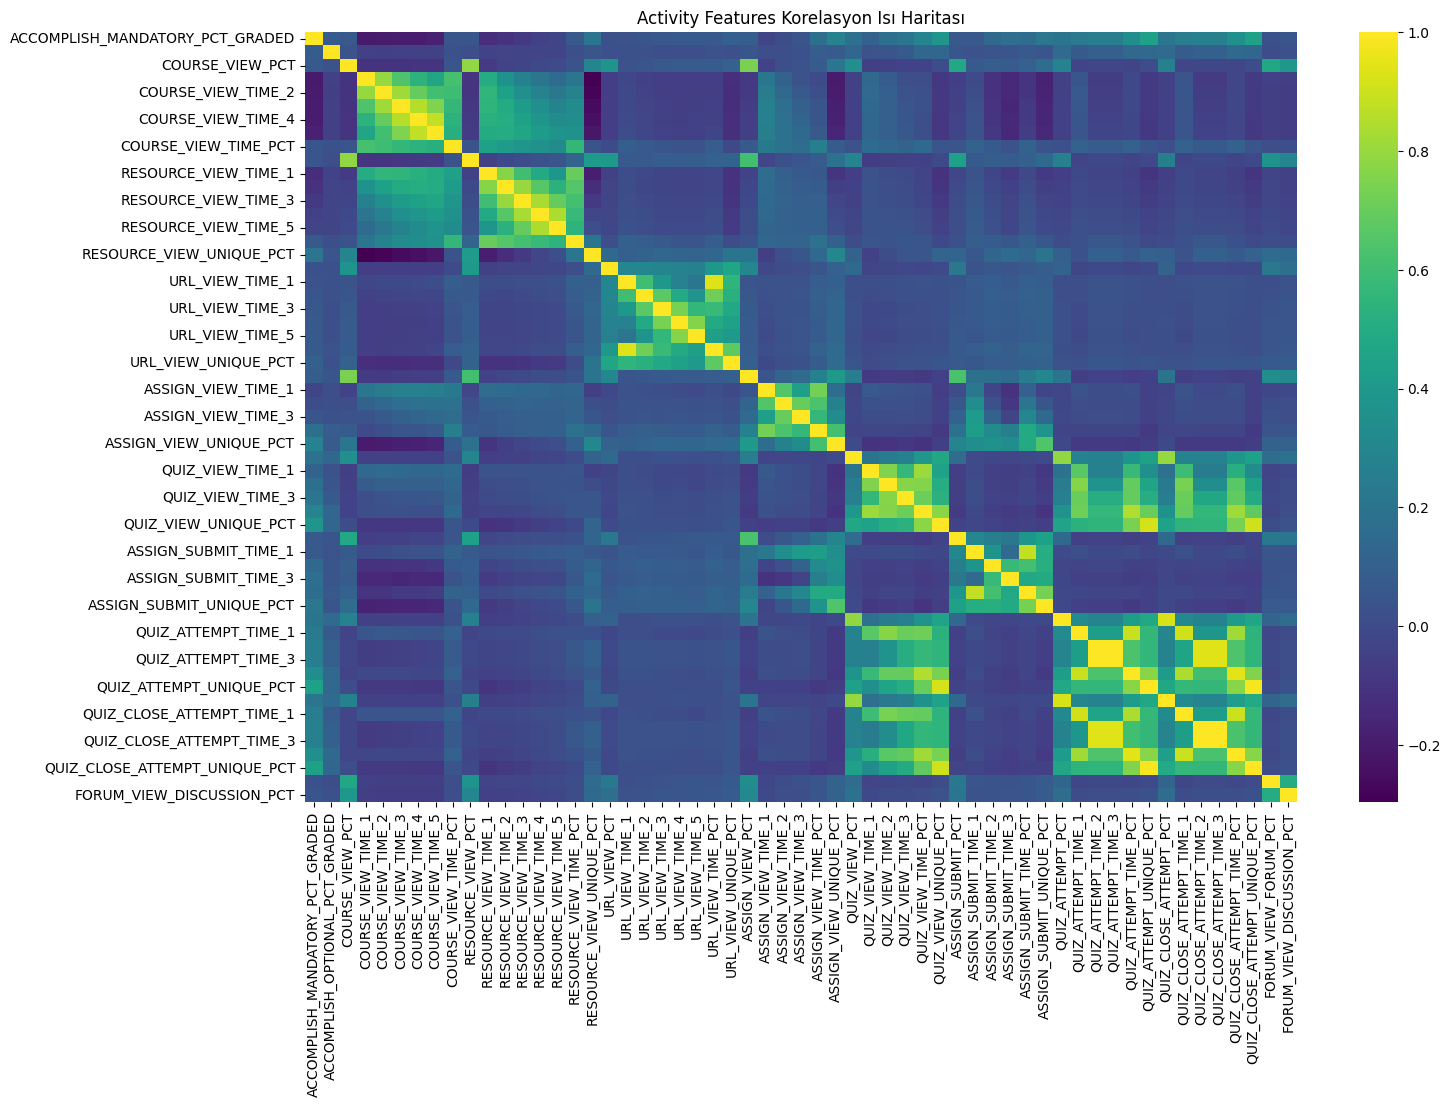

In [85]:
activity_cols2 = [
    col for col in df.columns
    if any(key in col.lower() for key in ["time", "view", "pct", "attempt", "submit"])
    and col not in ["PASS_FAIL"]
]

plt.figure(figsize=(16,10))
sns.heatmap(df[activity_cols2].corr(), cmap="viridis")

plt.title("Activity Features Korelasyon Isı Haritası")
plt.show()


TARGET histogram: Shows the overall distribution of student scores.

PASS/FAIL distribution: Used to check class balance in the dataset.

Correlation matrix: Reveals how strongly features are related to each other.


Activity heatmap: Visualizes relationships among LMS activity-based features.

TARGET histogramı: Notların genel dağılımını gösterir.

PASS/FAIL dağılımı: Sınıf dengesi analiz edilir.

Korelasyon matrisi: Değişkenler arası ilişki gücünü görmeye yarar.


Activity heatmap: LMS aktivitelerinin birbirleriyle ilişkisini gösterir.

# Bölüm 3) Feature Engineering

In [86]:
# Ek etiket: TARGET >= 8 ise HIGH_PERFORMER (opsiyonel)
if "TARGET" in df.columns:
    df["HIGH_PERFORMER"] = (df["TARGET"] >= 8).astype(int)
else:
    df["HIGH_PERFORMER"] = 0  # TARGET yoksa sabit bırak


In [87]:
# Toplam aktivite (tüm view/time/pct/attempt/submit kolonlarının toplamı)
fe_activity_cols = [
    col for col in df.columns
    if any(k in col.lower() for k in ["view", "time", "pct", "attempt", "submit"])
    and col not in ["PASS_FAIL"]
]


In [88]:
df["TOTAL_ACTIVITY"] = df[fe_activity_cols].sum(axis=1)

In [89]:
# Course view / Resource view oranı
if "COURSE_VIEW_PCT" in df.columns and "RESOURCE_VIEW_PCT" in df.columns:
    df["VIEW_RATIO"] = df["COURSE_VIEW_PCT"] / (df["RESOURCE_VIEW_PCT"] + 1e-5)

In [90]:
# Quiz attempt / Quiz view oranı
if "QUIZ_ATTEMPT_PCT" in df.columns and "QUIZ_VIEW_PCT" in df.columns:
    df["ATTEMPT_RATIO"] = df["QUIZ_ATTEMPT_PCT"] / (df["QUIZ_VIEW_PCT"] + 1e-5)

In [91]:
# Toplam zaman (TIME kolonları toplamı)
time_cols = [col for col in df.columns if "TIME" in col.upper()]
df["TOTAL_TIME_SPENT"] = df[time_cols].sum(axis=1)

In [92]:
df.shape

(25260, 74)

HIGH_PERFORMER creates an additional label for students scoring ≥ 8.

TOTAL_ACTIVITY summarizes all LMS activity to measure engagement.

VIEW_RATIO compares course-page engagement vs resource engagement.

ATTEMPT_RATIO measures how often quizzes are attempted relative to views.

TOTAL_TIME_SPENT gives a global measure of time spent in the platform.

Variance threshold removes features with no useful variation.

HIGH_PERFORMER, TARGET ≥ 8 olan öğrenciler için ek bir etiket oluşturur.

TOTAL_ACTIVITY, tüm LMS aktivitelerini özetleyerek öğrencinin etkileşim seviyesini gösterir.

VIEW_RATIO, ders sayfası görüntüleme oranı ile kaynak görüntüleme oranını karşılaştırır.

ATTEMPT_RATIO, öğrencinin quiz görüntülemeye göre ne kadar sık deneme yaptığını ölçer.

TOTAL_TIME_SPENT, platformda harcanan toplam süreyi gösterir.

Variance threshold, çok az değişkenlik gösteren ve modele katkısı düşük olan özellikleri kaldırır.

# Bölüm 4) Train/Test Split + Baseline Modeller (LR + Decision Tree)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [94]:
# Hedefle direkt ilişkili kolonları çıkartıyoruz (PASS_FAIL zaten hedef)
drop_cols = ["PASS_FAIL"]
if "TARGET" in df.columns: drop_cols.append("TARGET")
if "BIN_TARGET" in df.columns: drop_cols.append("BIN_TARGET")
if "NP_TARGET" in df.columns: drop_cols.append("NP_TARGET")

X = df.drop(columns=[c for c in drop_cols if c in df.columns])
y = df["PASS_FAIL"].astype(int)

print("X shape:", X.shape)
print("y dağılımı:\n", y.value_counts())


X shape: (25260, 71)
y dağılımı:
 PASS_FAIL
1    15309
0     9951
Name: count, dtype: int64


In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (20208, 71) Test shape: (5052, 71)


In [96]:
def eval_binary(model, X_te, y_te, y_pred, y_proba=None, title="Model"):
    acc = accuracy_score(y_te, y_pred)
    f1  = f1_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred)
    rec  = recall_score(y_te, y_pred)
    auc = roc_auc_score(y_te, y_proba) if y_proba is not None else np.nan

    print(f"\n=== {title} ===")
    print("Accuracy:", acc)
    print("F1:", f1)
    print("Precision:", prec)
    print("Recall:", rec)
    print("ROC-AUC:", auc)
    print(classification_report(y_te, y_pred))
    return acc, f1, prec, rec, auc


In [97]:
logreg_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500))
])

logreg_pipe.fit(X_train, y_train)

pred_lr = logreg_pipe.predict(X_test)
proba_lr = logreg_pipe.predict_proba(X_test)[:, 1]

lr_metrics = eval_binary(
    logreg_pipe, X_test, y_test, pred_lr, proba_lr,
    "Logistic Regression (Baseline)"
)



=== Logistic Regression (Baseline) ===
Accuracy: 0.8968725257323832
F1: 0.9139269783578391
Precision: 0.9247743229689067
Recall: 0.9033311561071196
ROC-AUC: 0.9629407652238987
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1990
           1       0.92      0.90      0.91      3062

    accuracy                           0.90      5052
   macro avg       0.89      0.90      0.89      5052
weighted avg       0.90      0.90      0.90      5052



In [98]:
dt_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("model", DecisionTreeClassifier(max_depth=8, random_state=42))
])

dt_pipe.fit(X_train, y_train)

pred_dt = dt_pipe.predict(X_test)
proba_dt = dt_pipe.predict_proba(X_test)[:, 1]

dt_metrics = eval_binary(
    dt_pipe, X_test, y_test, pred_dt, proba_dt,
    "Decision Tree (Baseline)"
)



=== Decision Tree (Baseline) ===
Accuracy: 0.9101346001583531
F1: 0.9252059308072488
Precision: 0.9335106382978723
Recall: 0.9170476812540823
ROC-AUC: 0.9623616941664561
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1990
           1       0.93      0.92      0.93      3062

    accuracy                           0.91      5052
   macro avg       0.90      0.91      0.91      5052
weighted avg       0.91      0.91      0.91      5052



# Bölüm 5) Feature Selection (Chi-Square) + Base Model Karşılaştırma

In [99]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np


In [100]:
imputer_chi = SimpleImputer(strategy="median")
X_imputed_chi = imputer_chi.fit_transform(X)

scaler_chi = MinMaxScaler()
X_scaled_chi = scaler_chi.fit_transform(X_imputed_chi)

print("NaN var mı?", np.isnan(X_scaled_chi).sum())
print("Inf var mı?", np.isinf(X_scaled_chi).sum())


NaN var mı? 0
Inf var mı? 0


In [101]:
chi_selector = SelectKBest(score_func=chi2, k=20)
X_chi = chi_selector.fit_transform(X_scaled_chi, y)

chi_features = X.columns[chi_selector.get_support()]
print("Seçilen Chi-Square özellikleri:")
print(list(chi_features))


Seçilen Chi-Square özellikleri:
['ACCOMPLISH_MANDATORY', 'ACCOMPLISH_MANDATORY_GRADE', 'ACCOMPLISH_MANDATORY_PCT_GRADED', 'ACCOMPLISH_MANDATORY_PERCENTILE_GRADE', 'NP_ACCOMPLISH_MANDATORY_GRADE', 'COURSE_VIEW_TIME_1', 'RESOURCE_VIEW_UNIQUE_PCT', 'URL_VIEW_UNIQUE_PCT', 'ASSIGN_VIEW_UNIQUE_PCT', 'QUIZ_VIEW_UNIQUE_PCT', 'ASSIGN_SUBMIT_TIME_3', 'ASSIGN_SUBMIT_TIME_PCT', 'ASSIGN_SUBMIT_UNIQUE_PCT', 'QUIZ_ATTEMPT_TIME_PCT', 'QUIZ_ATTEMPT_UNIQUE_PCT', 'QUIZ_CLOSE_ATTEMPT_TIME_2', 'QUIZ_CLOSE_ATTEMPT_TIME_3', 'QUIZ_CLOSE_ATTEMPT_TIME_PCT', 'QUIZ_CLOSE_ATTEMPT_UNIQUE_PCT', 'HIGH_PERFORMER']


In [102]:
X_chi_train, X_chi_test, y_train2, y_test2 = train_test_split(
    X_chi, y, test_size=0.2, random_state=42, stratify=y
)

print("Chi Train shape:", X_chi_train.shape, "Chi Test shape:", X_chi_test.shape)


Chi Train shape: (20208, 20) Chi Test shape: (5052, 20)


In [103]:
scaler = StandardScaler()
X_chi_train_s = scaler.fit_transform(X_chi_train)
X_chi_test_s  = scaler.transform(X_chi_test)

lr_chi = LogisticRegression(max_iter=500)
lr_chi.fit(X_chi_train_s, y_train2)

pred_lr_chi = lr_chi.predict(X_chi_test_s)
proba_lr_chi = lr_chi.predict_proba(X_chi_test_s)[:, 1]

lr_chi_metrics = eval_binary(
    lr_chi, X_chi_test_s, y_test2, pred_lr_chi, proba_lr_chi,
    "LogReg (Chi-Square)"
)



=== LogReg (Chi-Square) ===
Accuracy: 0.8966745843230404
F1: 0.9138613861386139
Precision: 0.9236157438292195
Recall: 0.9043109079033311
ROC-AUC: 0.9631432800842883
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1990
           1       0.92      0.90      0.91      3062

    accuracy                           0.90      5052
   macro avg       0.89      0.89      0.89      5052
weighted avg       0.90      0.90      0.90      5052



In [104]:
dt_chi = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_chi.fit(X_chi_train, y_train2)

pred_dt_chi = dt_chi.predict(X_chi_test)
proba_dt_chi = dt_chi.predict_proba(X_chi_test)[:, 1]

dt_chi_metrics = eval_binary(
    dt_chi, X_chi_test, y_test2, pred_dt_chi, proba_dt_chi,
    "DecisionTree (Chi-Square)"
)



=== DecisionTree (Chi-Square) ===
Accuracy: 0.9111243072050673
F1: 0.925870893181443
Precision: 0.9362270450751252
Recall: 0.9157413455258001
ROC-AUC: 0.9668733937486256
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1990
           1       0.94      0.92      0.93      3062

    accuracy                           0.91      5052
   macro avg       0.91      0.91      0.91      5052
weighted avg       0.91      0.91      0.91      5052



# Bölüm 6) Dimension Reduction (PCA) + Base Model Karşılaştırma

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [106]:
imputer_pca = SimpleImputer(strategy="median")
X_imputed_pca = imputer_pca.fit_transform(X)

scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_imputed_pca)

print("NaN var mı?", np.isnan(X_scaled_pca).sum())
print("Inf var mı?", np.isinf(X_scaled_pca).sum())


NaN var mı? 0
Inf var mı? 0


In [107]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled_pca)

print("Orijinal boyut:", X.shape)
print("PCA boyutu:", X_pca.shape)
print("Açıklanan toplam varyans:", pca.explained_variance_ratio_.sum())


Orijinal boyut: (25260, 71)
PCA boyutu: (25260, 39)
Açıklanan toplam varyans: 0.953596226472526


In [108]:
X_pca_train, X_pca_test, y_train3, y_test3 = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

print("PCA Train shape:", X_pca_train.shape, "PCA Test shape:", X_pca_test.shape)


PCA Train shape: (20208, 39) PCA Test shape: (5052, 39)


In [109]:
lr_pca = LogisticRegression(max_iter=500)
lr_pca.fit(X_pca_train, y_train3)

pred_lr_pca = lr_pca.predict(X_pca_test)
proba_lr_pca = lr_pca.predict_proba(X_pca_test)[:, 1]

lr_pca_metrics = eval_binary(
    lr_pca, X_pca_test, y_test3, pred_lr_pca, proba_lr_pca,
    "LogReg (PCA)"
)



=== LogReg (PCA) ===
Accuracy: 0.8927157561361837
F1: 0.910235177210997
Precision: 0.9233870967741935
Recall: 0.8974526453298498
ROC-AUC: 0.9615719026221901
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1990
           1       0.92      0.90      0.91      3062

    accuracy                           0.89      5052
   macro avg       0.89      0.89      0.89      5052
weighted avg       0.89      0.89      0.89      5052



In [110]:
dt_pca = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_pca.fit(X_pca_train, y_train3)

pred_dt_pca = dt_pca.predict(X_pca_test)
proba_dt_pca = dt_pca.predict_proba(X_pca_test)[:, 1]

dt_pca_metrics = eval_binary(
    dt_pca, X_pca_test, y_test3, pred_dt_pca, proba_dt_pca,
    "DecisionTree (PCA)"
)



=== DecisionTree (PCA) ===
Accuracy: 0.8234362628661916
F1: 0.8532411977624218
Precision: 0.8597480106100795
Recall: 0.8468321358589157
ROC-AUC: 0.9004115121656617
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1990
           1       0.86      0.85      0.85      3062

    accuracy                           0.82      5052
   macro avg       0.81      0.82      0.82      5052
weighted avg       0.82      0.82      0.82      5052



# Bölüm 7) Karşılaştırma Tablosu (Base Modeller)

In [112]:
rows = [
    ["LogReg (Original)", *lr_metrics],
    ["DecisionTree (Original)", *dt_metrics],
    ["LogReg (Chi-Square)", *lr_chi_metrics],
    ["DecisionTree (Chi-Square)", *dt_chi_metrics],
    ["LogReg (PCA)", *lr_pca_metrics],
    ["DecisionTree (PCA)", *dt_pca_metrics],
]

In [113]:
df_results = pd.DataFrame(
    rows,
    columns=["Model", "Accuracy", "F1", "Precision", "Recall", "ROC_AUC"]
)


In [114]:
df_results

,Model,Accuracy,F1,Precision,Recall,ROC_AUC
0,LogReg (Original),0.896873,0.913927,0.924774,0.903331,0.962941
1,DecisionTree (Original),0.910135,0.925206,0.933511,0.917048,0.962362
2,LogReg (Chi-Square),0.896675,0.913861,0.923616,0.904311,0.963143
3,DecisionTree (Chi-Square),0.911124,0.925871,0.936227,0.915741,0.966873
4,LogReg (PCA),0.892716,0.910235,0.923387,0.897453,0.961572
5,DecisionTree (PCA),0.823436,0.853241,0.859748,0.846832,0.900412


# Bölüm 8) Final için Advanced Modeller (PyTorch) - 2 Model

In [115]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
)


In [116]:
# NaN doldur + standardize
imputer_dl = SimpleImputer(strategy="median")
X_imputed_dl = imputer_dl.fit_transform(X)

scaler_dl = StandardScaler()
X_scaled_dl = scaler_dl.fit_transform(X_imputed_dl)

print("X_scaled_dl shape:", X_scaled_dl.shape)


X_scaled_dl shape: (25260, 71)


In [117]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X_scaled_dl, y.values, test_size=0.2, random_state=42, stratify=y.values
)

print("Train:", X_train_dl.shape, "Test:", X_test_dl.shape)


Train: (20208, 71) Test: (5052, 71)


In [118]:
X_train_t = torch.tensor(X_train_dl, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_dl, dtype=torch.float32)
y_train_t = torch.tensor(y_train_dl, dtype=torch.float32)
y_test_t  = torch.tensor(y_test_dl, dtype=torch.float32)

print(X_train_t.shape, y_train_t.shape)


torch.Size([20208, 71]) torch.Size([20208])


In [119]:
class TabDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [120]:
train_ds = TabDataset(X_train_t, y_train_t)
test_ds  = TabDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=512, shuffle=False)

print("Train batches:", len(train_loader), "Test batches:", len(test_loader))

Train batches: 79 Test batches: 10


In [121]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cpu


# Bölüm 8.1) Advanced Model 1: MLP

In [122]:
class MLPClassifier(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.20),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x).squeeze(1)


In [123]:
def train_torch_model(model, train_loader, test_loader, epochs=15, lr=1e-3):
    model = model.to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.BCEWithLogitsLoss()

    for ep in range(1, epochs + 1):
        model.train()
        total_loss = 0.0

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)

            opt.zero_grad()
            logits = model(xb)
            loss = loss_fn(logits, yb)
            loss.backward()
            opt.step()

            total_loss += loss.item() * len(yb)

        avg_loss = total_loss / len(train_loader.dataset)
        if ep in [1, 5, 10, epochs]:
            print(f"Epoch {ep}/{epochs} - Loss: {avg_loss:.4f}")

    # Evaluation + collect probs
    model.eval()
    y_true, y_prob = [], []

    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            logits = model(xb)

            prob = torch.sigmoid(logits).cpu().numpy().reshape(-1)
            y_prob.extend(prob.tolist())
            y_true.extend(yb.cpu().numpy().reshape(-1).tolist())

    y_pred = (np.array(y_prob) >= 0.5).astype(int)

    acc = accuracy_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec  = recall_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)

    return (acc, f1, prec, rec, auc), np.array(y_true), np.array(y_prob)


In [124]:
mlp_metrics, y_true_mlp, y_prob_mlp = train_torch_model(
    mlp, train_loader, test_loader, epochs=15, lr=1e-3
)


Epoch 1/15 - Loss: 0.1824
Epoch 5/15 - Loss: 0.1763
Epoch 10/15 - Loss: 0.1696
Epoch 15/15 - Loss: 0.1637


In [125]:
print("\n=== MLP (PyTorch) ===")
print("Accuracy, F1, Precision, Recall, ROC_AUC:", mlp_metrics)



=== MLP (PyTorch) ===
Accuracy, F1, Precision, Recall, ROC_AUC: (0.9136975455265242, 0.9292896529354525, 0.9230025773195877, 0.9356629653821033, 0.9735634409802113)


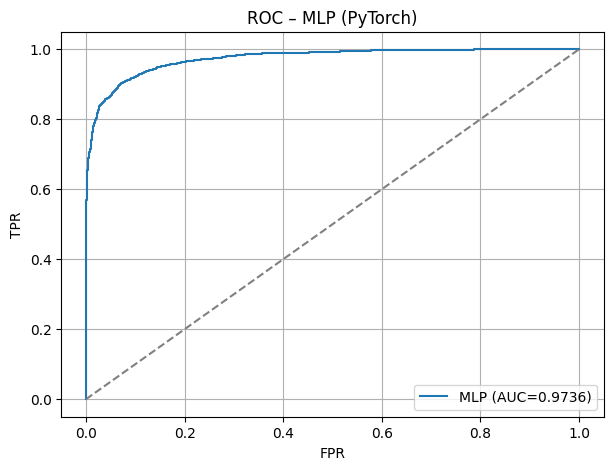

In [128]:
fpr, tpr, _ = roc_curve(y_true_mlp, y_prob_mlp)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"MLP (AUC={mlp_metrics[-1]:.4f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.title("ROC – MLP (PyTorch)")
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.legend(); plt.grid(True)
plt.show()


# Bölüm 8.2) Advanced Model 2: 1D-CNN

In [129]:
class CNN1DClassifier(nn.Module):
    def __init__(self, in_dim):
        super().__init__()

        # (batch, channels=1, features=in_dim) formatına sokacağız
        self.conv = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
        )

        # boyut hesabı: iki kez /2 (maxpool)
        conv_out = in_dim
        conv_out = conv_out // 2
        conv_out = conv_out // 2
        conv_out = max(conv_out, 1)

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * conv_out, 64),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        x = x.unsqueeze(1)   # (B, 1, F)
        x = self.conv(x)
        x = self.fc(x)
        return x.squeeze(1)


In [131]:
cnn = CNN1DClassifier(in_dim=X_train_t.shape[1])
cnn_metrics, y_true_cnn, y_prob_cnn = train_torch_model(
    cnn, train_loader, test_loader, epochs=15, lr=1e-3
)


Epoch 1/15 - Loss: 0.4647
Epoch 5/15 - Loss: 0.2443
Epoch 10/15 - Loss: 0.2219
Epoch 15/15 - Loss: 0.2076


In [132]:
print("\n=== 1D-CNN (PyTorch) ===")
print("Accuracy, F1, Precision, Recall, ROC_AUC:", cnn_metrics)



=== 1D-CNN (PyTorch) ===
Accuracy, F1, Precision, Recall, ROC_AUC: (0.9123119556611243, 0.926885624690543, 0.9369369369369369, 0.9170476812540823, 0.9724220383432511)


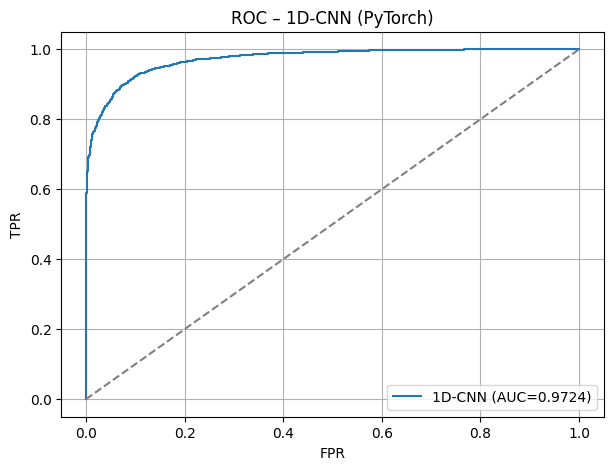

In [134]:
fpr, tpr, _ = roc_curve(y_true_cnn, y_prob_cnn)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"1D-CNN (AUC={cnn_metrics[-1]:.4f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.title("ROC – 1D-CNN (PyTorch)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.show()


# Bölüm 9) Final Karşılaştırma Tablosu (Base + Advanced)

In [135]:
adv_rows = pd.DataFrame(
    [
        ["MLP (PyTorch)", *mlp_metrics],
        ["1D-CNN (PyTorch)", *cnn_metrics],
    ],
    columns=["Model", "Accuracy", "F1", "Precision", "Recall", "ROC_AUC"]
)


In [136]:
final_rows = df_results.copy()

df_final = pd.concat(
    [final_rows, adv_rows],
    ignore_index=True
)
df_final

,Model,Accuracy,F1,Precision,Recall,ROC_AUC
0,LogReg (Original),0.896873,0.913927,0.924774,0.903331,0.962941
1,DecisionTree (Original),0.910135,0.925206,0.933511,0.917048,0.962362
2,LogReg (Chi-Square),0.896675,0.913861,0.923616,0.904311,0.963143
3,DecisionTree (Chi-Square),0.911124,0.925871,0.936227,0.915741,0.966873
4,LogReg (PCA),0.892716,0.910235,0.923387,0.897453,0.961572
5,DecisionTree (PCA),0.823436,0.853241,0.859748,0.846832,0.900412
6,MLP (PyTorch),0.913698,0.929290,0.923003,0.935663,0.973563
7,1D-CNN (PyTorch),0.912312,0.926886,0.936937,0.917048,0.972422


# Bölüm 10) ROC Curve (Tüm Modeller için)

In [ ]:
from sklearn.metrics import roc_curve


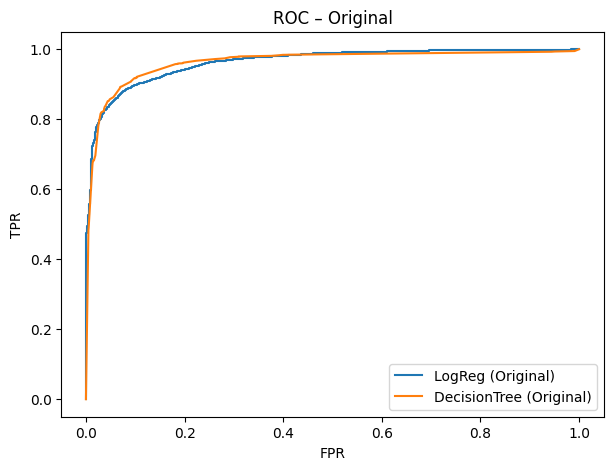

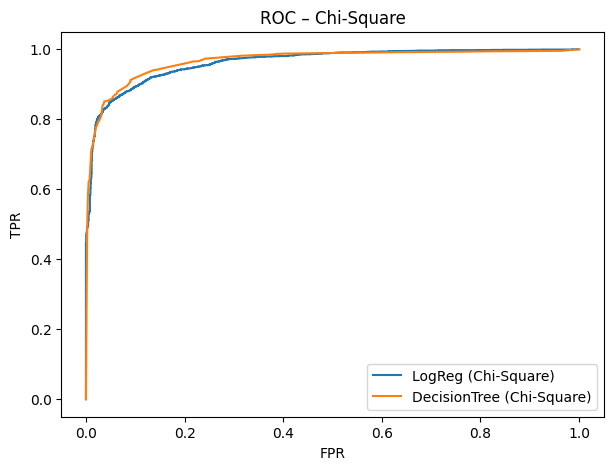

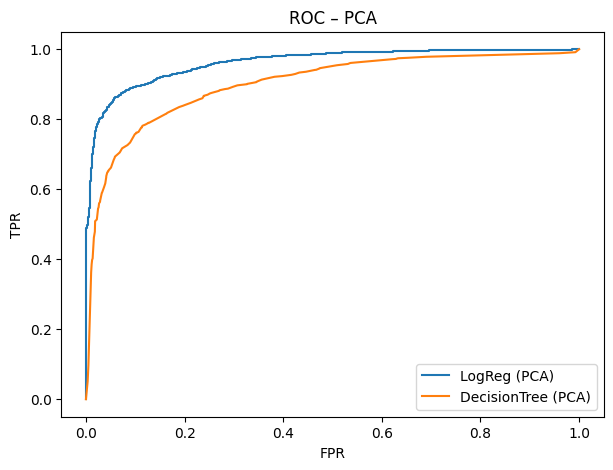

In [138]:
# 1) Original
plt.figure(figsize=(7,5))
fpr, tpr, _ = roc_curve(y_test, proba_lr)
plt.plot(fpr, tpr, label="LogReg (Original)")
fpr, tpr, _ = roc_curve(y_test, proba_dt)
plt.plot(fpr, tpr, label="DecisionTree (Original)")
plt.legend()
plt.title("ROC – Original")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# 2) Chi-Square
plt.figure(figsize=(7,5))
fpr, tpr, _ = roc_curve(y_test2, lr_chi.predict_proba(X_chi_test_s)[:, 1])
plt.plot(fpr, tpr, label="LogReg (Chi-Square)")
fpr, tpr, _ = roc_curve(y_test2, dt_chi.predict_proba(X_chi_test)[:, 1])
plt.plot(fpr, tpr, label="DecisionTree (Chi-Square)")
plt.legend()
plt.title("ROC – Chi-Square")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# 3) PCA
plt.figure(figsize=(7,5))
fpr, tpr, _ = roc_curve(y_test3, lr_pca.predict_proba(X_pca_test)[:, 1])
plt.plot(fpr, tpr, label="LogReg (PCA)")
fpr, tpr, _ = roc_curve(y_test3, dt_pca.predict_proba(X_pca_test)[:, 1])
plt.plot(fpr, tpr, label="DecisionTree (PCA)")
plt.legend()
plt.title("ROC – PCA")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
